In [1]:
# !pip install dtale

In [2]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install matplotlib
# !pip install wordcloud

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## import dtale
pd.set_option('display.max_columns', None)

# import module
from geopy.geocoders import Nominatim

# initialize Nominatim API 
geolocator = Nominatim(user_agent="GetLoc")

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud


In [4]:
Crash_df = pd.read_csv(r"Data\Motor_Vehicle_Collisions_-_Crashes_20231209.csv")

Crash_df = Crash_df[['COLLISION_ID','CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
        'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']]


###### Consider only from 2020 Year
Crash_df = Crash_df[pd.to_datetime(Crash_df['CRASH DATE']) >= '2020-01-01']


Crash_df.head(2)

,COLLISION_ID,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,4455765,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
1,4513547,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN


In [5]:
pd.to_datetime(Crash_df['CRASH DATE']).min(), pd.to_datetime(Crash_df['CRASH DATE']).max()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2023-12-04 00:00:00'))

# Handling Missing Values

In [6]:
# ###### Missing values Percentage

# Crash_null_percentage = (Crash_df.isnull().mean() * 100).round(0)
# Crash_null_percentage

In [7]:
# # Set a threshold for deleting columns
# threshold = 50

# # Drop columns with null value percentage greater than the threshold
# Crash_columns_to_drop = Crash_null_percentage[Crash_null_percentage > threshold].index
# Crash_df.drop(Crash_columns_to_drop, axis=1, inplace=True)


# Crash_df.head(2)

In [8]:
# Crash_columns_to_drop

# Changing Data Types & Column Names

In [9]:
Crash_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416468 entries, 0 to 2048368
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   COLLISION_ID                   416468 non-null  int64  
 1   CRASH DATE                     416468 non-null  object 
 2   CRASH TIME                     416468 non-null  object 
 3   BOROUGH                        275270 non-null  object 
 4   ZIP CODE                       275226 non-null  object 
 5   LATITUDE                       383073 non-null  float64
 6   LONGITUDE                      383073 non-null  float64
 7   LOCATION                       383073 non-null  object 
 8   ON STREET NAME                 304267 non-null  object 
 9   CROSS STREET NAME              196283 non-null  object 
 10  OFF STREET NAME                112197 non-null  object 
 11  NUMBER OF PERSONS INJURED      416467 non-null  float64
 12  NUMBER OF PERSONS KILLED     

In [10]:
##### Renaming Column Names

# Function to convert to PascalCase
def to_pascal_case(s):
    s = s.lower().split()
    return ''.join([word.capitalize() for word in s])

# Apply the function to your columns
pascal_case_columns = [to_pascal_case(column) for column in Crash_df.columns]

Crash_df.columns = pascal_case_columns
Crash_df.rename(columns = {'Collision_id':'CollisionId'}, inplace=True)
Crash_df.head(2)

,CollisionId,CrashDate,CrashTime,Borough,ZipCode,Latitude,Longitude,Location,OnStreetName,CrossStreetName,OffStreetName,NumberOfPersonsInjured,NumberOfPersonsKilled,NumberOfPedestriansInjured,NumberOfPedestriansKilled,NumberOfCyclistInjured,NumberOfCyclistKilled,NumberOfMotoristInjured,NumberOfMotoristKilled,ContributingFactorVehicle1,ContributingFactorVehicle2,ContributingFactorVehicle3,ContributingFactorVehicle4,ContributingFactorVehicle5,VehicleTypeCode1,VehicleTypeCode2,VehicleTypeCode3,VehicleTypeCode4,VehicleTypeCode5
0,4455765,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
1,4513547,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN


In [11]:
pd.to_datetime(Crash_df['CrashTime']).dt.hour

0           2
1          11
2           6
3           9
4           8
           ..
2048364    18
2048365    21
2048366    17
2048367    13
2048368     3
Name: CrashTime, Length: 416468, dtype: int64

In [12]:
###### Converting DataTypes

Crash_df['CrashDate'] = pd.to_datetime(Crash_df['CrashDate']).dt.date
Crash_df['CrashHour'] = pd.to_datetime(Crash_df['CrashTime']).dt.hour
Crash_df['CrashTime'] = pd.to_datetime(Crash_df['CrashTime']).dt.time


### Adding Crash Year, Month columns
Crash_df['CrashYear'] = pd.to_datetime(Crash_df['CrashDate']).dt.year.astype(int)
Crash_df['CrashMonth'] = pd.to_datetime(Crash_df['CrashDate']).dt.month_name()

##### Filling nan values with 0 as they are very less < 50 
Crash_df['NumberOfPersonsInjured'] = Crash_df['NumberOfPersonsInjured'].fillna(0)##.astype(int)
Crash_df['NumberOfPersonsKilled'] = Crash_df['NumberOfPersonsKilled'].fillna(0)##.astype(int)

## Converting from int 64 to int 32 (for saving memory)
Crash_df['NumberOfPedestriansInjured'] = Crash_df['NumberOfPedestriansInjured'].fillna(0)##.astype(int)
Crash_df['NumberOfPedestriansKilled'] = Crash_df['NumberOfPedestriansKilled'].fillna(0)##.astype(int)
Crash_df['NumberOfCyclistInjured'] = Crash_df['NumberOfCyclistInjured'].fillna(0)##.astype(int)
Crash_df['NumberOfCyclistKilled'] = Crash_df['NumberOfCyclistKilled'].fillna(0)##.astype(int)
Crash_df['NumberOfMotoristInjured'] = Crash_df['NumberOfMotoristInjured'].fillna(0)##.astype(int)
Crash_df['NumberOfMotoristKilled'] = Crash_df['NumberOfMotoristKilled'].fillna(0)##.astype(int)
Crash_df['CollisionId'] = Crash_df['CollisionId'].fillna(0)##.astype(int)

In [13]:
# ####### Rearranging Columns
# Crash_df = Crash_df[['CollisionId', 'CrashDate', 'CrashTime','CrashHour','CrashYear','CrashMonth', 'Borough', 'ZipCode',
#                        'Latitude', 'Longitude', 'Location', 'OnStreetName',
#                        'NumberOfPersonsInjured', 'NumberOfPersonsKilled',
#                        'NumberOfPedestriansInjured', 'NumberOfPedestriansKilled',
#                        'NumberOfCyclistInjured', 'NumberOfCyclistKilled',
#                        'NumberOfMotoristInjured', 'NumberOfMotoristKilled',
#                        'ContributingFactorVehicle1', 'ContributingFactorVehicle2',
#                        'VehicleTypeCode1', 'VehicleTypeCode2']]


# Crash_df.info()

In [14]:
Crash_null_percentage = (Crash_df.isnull().mean() * 100).round(0)
Crash_null_percentage

CollisionId                    0.0
CrashDate                      0.0
CrashTime                      0.0
Borough                       34.0
ZipCode                       34.0
Latitude                       8.0
Longitude                      8.0
Location                       8.0
OnStreetName                  27.0
CrossStreetName               53.0
OffStreetName                 73.0
NumberOfPersonsInjured         0.0
NumberOfPersonsKilled          0.0
NumberOfPedestriansInjured     0.0
NumberOfPedestriansKilled      0.0
NumberOfCyclistInjured         0.0
NumberOfCyclistKilled          0.0
NumberOfMotoristInjured        0.0
NumberOfMotoristKilled         0.0
ContributingFactorVehicle1     1.0
ContributingFactorVehicle2    23.0
ContributingFactorVehicle3    90.0
ContributingFactorVehicle4    97.0
ContributingFactorVehicle5    99.0
VehicleTypeCode1               1.0
VehicleTypeCode2              33.0
VehicleTypeCode3              91.0
VehicleTypeCode4              98.0
VehicleTypeCode5    

In [15]:
Crash_df['CollisionId'].min(), Crash_df['CollisionId'].max()

(4063247, 4685131)

In [16]:
# correlation_matrix = Crash_df.corr()


# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.show()


# Deleting some columns based on null values, as we have other supporting columns instead them

In [17]:
## del Crash_df['VehicleTypeCode2']
## del Crash_df['OnStreetName']
## del Crash_df['ContributingFactorVehicle2']

In [18]:
Crash_null_percentage = (Crash_df.isnull().mean() * 100).round(0)
Crash_null_percentage

CollisionId                    0.0
CrashDate                      0.0
CrashTime                      0.0
Borough                       34.0
ZipCode                       34.0
Latitude                       8.0
Longitude                      8.0
Location                       8.0
OnStreetName                  27.0
CrossStreetName               53.0
OffStreetName                 73.0
NumberOfPersonsInjured         0.0
NumberOfPersonsKilled          0.0
NumberOfPedestriansInjured     0.0
NumberOfPedestriansKilled      0.0
NumberOfCyclistInjured         0.0
NumberOfCyclistKilled          0.0
NumberOfMotoristInjured        0.0
NumberOfMotoristKilled         0.0
ContributingFactorVehicle1     1.0
ContributingFactorVehicle2    23.0
ContributingFactorVehicle3    90.0
ContributingFactorVehicle4    97.0
ContributingFactorVehicle5    99.0
VehicleTypeCode1               1.0
VehicleTypeCode2              33.0
VehicleTypeCode3              91.0
VehicleTypeCode4              98.0
VehicleTypeCode5    

In [19]:
Crash_df['ContributingFactorVehicle1'].value_counts() / len(Crash_df) * 100

Unspecified                                              24.823756
Driver Inattention/Distraction                           24.793261
Failure to Yield Right-of-Way                             6.745536
Following Too Closely                                     6.545281
Passing or Lane Usage Improper                            4.287965
Passing Too Closely                                       3.671831
Unsafe Speed                                              3.420191
Backing Unsafely                                          3.222336
Other Vehicular                                           2.836713
Traffic Control Disregarded                               2.701288
Turning Improperly                                        2.161270
Unsafe Lane Changing                                      2.125974
Driver Inexperience                                       1.922357
Alcohol Involvement                                       1.603965
Reaction to Uninvolved Vehicle                            1.37

In [20]:
[Crash_df['VehicleTypeCode1'].value_counts() / len(Crash_df) * 100]

[Sedan                                  46.741406
 Station Wagon/Sport Utility Vehicle    35.136193
 Taxi                                    2.762037
 Pick-up Truck                           2.191765
 Box Truck                               1.711776
                                          ...    
 Mercedes                                0.000240
 Fire                                    0.000240
 OML/OMNIBU                              0.000240
 post offic                              0.000240
 Utility Ve                              0.000240
 Name: VehicleTypeCode1, Length: 865, dtype: float64]

In [21]:
Crash_df['CollisionId'].nunique()

416468

In [22]:
len(Crash_df['CollisionId'])

416468

# Handling Missing Values

In [23]:
Crash_null_percentage = (Crash_df.isnull().mean() * 100).round(0)
Crash_null_percentage

CollisionId                    0.0
CrashDate                      0.0
CrashTime                      0.0
Borough                       34.0
ZipCode                       34.0
Latitude                       8.0
Longitude                      8.0
Location                       8.0
OnStreetName                  27.0
CrossStreetName               53.0
OffStreetName                 73.0
NumberOfPersonsInjured         0.0
NumberOfPersonsKilled          0.0
NumberOfPedestriansInjured     0.0
NumberOfPedestriansKilled      0.0
NumberOfCyclistInjured         0.0
NumberOfCyclistKilled          0.0
NumberOfMotoristInjured        0.0
NumberOfMotoristKilled         0.0
ContributingFactorVehicle1     1.0
ContributingFactorVehicle2    23.0
ContributingFactorVehicle3    90.0
ContributingFactorVehicle4    97.0
ContributingFactorVehicle5    99.0
VehicleTypeCode1               1.0
VehicleTypeCode2              33.0
VehicleTypeCode3              91.0
VehicleTypeCode4              98.0
VehicleTypeCode5    

In [24]:
[Crash_df['VehicleTypeCode1'].value_counts() / len(Crash_df) * 100]

[Sedan                                  46.741406
 Station Wagon/Sport Utility Vehicle    35.136193
 Taxi                                    2.762037
 Pick-up Truck                           2.191765
 Box Truck                               1.711776
                                          ...    
 Mercedes                                0.000240
 Fire                                    0.000240
 OML/OMNIBU                              0.000240
 post offic                              0.000240
 Utility Ve                              0.000240
 Name: VehicleTypeCode1, Length: 865, dtype: float64]

In [25]:
[Crash_df['ContributingFactorVehicle1'].value_counts() / len(Crash_df) * 100]

[Unspecified                                              24.823756
 Driver Inattention/Distraction                           24.793261
 Failure to Yield Right-of-Way                             6.745536
 Following Too Closely                                     6.545281
 Passing or Lane Usage Improper                            4.287965
 Passing Too Closely                                       3.671831
 Unsafe Speed                                              3.420191
 Backing Unsafely                                          3.222336
 Other Vehicular                                           2.836713
 Traffic Control Disregarded                               2.701288
 Turning Improperly                                        2.161270
 Unsafe Lane Changing                                      2.125974
 Driver Inexperience                                       1.922357
 Alcohol Involvement                                       1.603965
 Reaction to Uninvolved Vehicle                 

In [26]:
######## Filling null values with most repeating values 

Crash_df['VehicleTypeCode1'] = Crash_df['VehicleTypeCode1'].fillna('Sedan')
Crash_df['ContributingFactorVehicle1'] = Crash_df['ContributingFactorVehicle1'].fillna('Driver Inattention/Distraction')


In [27]:
# ######## Creating suburb names (Borough) column via lat & long



# from datetime import datetime

# now = datetime.now()
# dt_string_S = now.strftime("%d/%m/%Y %H:%M:%S")

# print("Started at = ", dt_string_S)


# suburb_list = []
# for i,j in zip(Crash_df['Latitude'], Crash_df['Longitude']):
#     try:
#         location = geolocator.reverse(str(i)+","+str(j))
#         address = location.raw['address']
#         suburb = address.get('suburb', '')
#         ## print('suburb : ', suburb)
#         suburb_list.append(suburb)
        
#     except:
#         suburb_list.append("Error")
    


# now = datetime.now()
# dt_string_E = now.strftime("%d/%m/%Y %H:%M:%S")

# print("Ended at = ", dt_string_E)

# Creating Category Columns for VehicleTypes & Contributing Factors




In [28]:
####### Creating a category column on VehicleType

################### Categorizing Data

def categorize_vehicle_type(vehicle_type):
    """
    Categorizes the given vehicle type into one of the predefined 20 categories.
    """
    vehicle_type = vehicle_type.lower()
    if any(word in vehicle_type for word in ['sedan', 'car', '2 dr', '4 dr', '4door', '3door']):
        return 'Car'
    elif 'suv' in vehicle_type or 'sport utility' in vehicle_type or 'station wagon' in vehicle_type:
        return 'SUV'
    elif any(word in vehicle_type for word in ['truck', '18 wheeler', '2 ton', 'tractor', 'trailer']):
        return 'Truck'
    elif 'van' in vehicle_type or 'passenger' in vehicle_type:
        return 'Van'
    elif 'motorcycle' in vehicle_type or 'bike' in vehicle_type:
        return 'Motorcycle'
    elif 'bicycle' in vehicle_type:
        return 'Bicycle'
    elif 'bus' in vehicle_type:
        return 'Bus'
    elif 'taxi' in vehicle_type:
        return 'Taxi'
    elif any(word in vehicle_type for word in ['emergency', 'ambulance', 'fire', 'police']):
        return 'Emergency Vehicle'
    elif 'construction' in vehicle_type:
        return 'Construction Vehicle'
    elif 'trailer' in vehicle_type:
        return 'Trailer'
    elif 'scooter' in vehicle_type:
        return 'Scooter'
    elif 'rv' in vehicle_type or 'recreational vehicle' in vehicle_type:
        return 'RV'
    elif 'atv' in vehicle_type:
        return 'ATV'
    elif 'tractor' in vehicle_type:
        return 'Tractor'
    elif 'moped' in vehicle_type:
        return 'Moped'
    elif 'golf' in vehicle_type:
        return 'Golf Cart'
    elif 'tanker' in vehicle_type:
        return 'Tanker'
    elif 'garbage' in vehicle_type:
        return 'Garbage Truck'
    else:
        return 'Other'

# Apply the categorization function to the dataset
Crash_df['Categorized_VehicleType'] = Crash_df['VehicleTypeCode1'].astype(str).apply(categorize_vehicle_type)

# Display the first few rows of the updated dataset
Crash_df.head(2)


,CollisionId,CrashDate,CrashTime,Borough,ZipCode,Latitude,Longitude,Location,OnStreetName,CrossStreetName,OffStreetName,NumberOfPersonsInjured,NumberOfPersonsKilled,NumberOfPedestriansInjured,NumberOfPedestriansKilled,NumberOfCyclistInjured,NumberOfCyclistKilled,NumberOfMotoristInjured,NumberOfMotoristKilled,ContributingFactorVehicle1,ContributingFactorVehicle2,ContributingFactorVehicle3,ContributingFactorVehicle4,ContributingFactorVehicle5,VehicleTypeCode1,VehicleTypeCode2,VehicleTypeCode3,VehicleTypeCode4,VehicleTypeCode5,CrashHour,CrashYear,CrashMonth,Categorized_VehicleType
0,4455765,2021-09-11,02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN,2,2021,September,Car
1,4513547,2022-03-26,11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN,11,2022,March,Car


In [29]:
# Define the function that maps contributing factors to categories
def categorize_factor(factor):
    categories = {
        'Driver Distraction': [
            'Driver Inattention/Distraction', 'Passenger Distraction', 'Outside Car Distraction',
            'Cell Phone (hand-Held)', 'Cell Phone (hands-free)', 'Listening/Using Headphones',
            'Using On Board Navigation Device', 'Other Electronic Device', 'Eating or Drinking'
        ],
        'Traffic Violations': [
            'Failure to Yield Right-of-Way', 'Following Too Closely', 'Passing or Lane Usage Improper',
            'Passing Too Closely', 'Traffic Control Disregarded', 'Turning Improperly', 'Unsafe Lane Changing',
            'Failure to Keep Right', 'Traffic Control Device Improper/Non-Working'
        ],
        'Speed Related': [
            'Unsafe Speed'
        ],
        'Impairment': [
            'Alcohol Involvement', 'Drugs (illegal)', 'Prescription Medication'
        ],
        'Health Related': [
            'Driver Inexperience', 'Lost Consciousness', 'Illnes', 'Physical Disability', 'Fatigued/Drowsy'
        ],
        'Vehicle Condition': [
            'Brakes Defective', 'Steering Failure', 'Tire Failure/Inadequate', 'Accelerator Defective',
            'Vehicle Vandalism', 'Tow Hitch Defective', 'Headlights Defective', 'Other Lighting Defects',
            'Shoulders Defective/Improper', 'Windshield Inadequate'
        ],
        'Environmental': [
            'Pavement Slippery', 'View Obstructed/Limited', 'Glare', 'Pavement Defective', 'Obstruction/Debris'
        ],
        'Aggressive Driving': [
            'Aggressive Driving/Road Rage'
        ],
        'Vehicle Size': [
            'Oversized Vehicle'
        ],
        'Other': [
            'Unspecified', 'Backing Unsafely', 'Other Vehicular', 'Reaction to Uninvolved Vehicle',
            'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion', 'Driverless/Runaway Vehicle',
            'Animals Action', 'Lane Marking Improper/Inadequate', 'Tinted Windows'
        ]
    }
    
    for category, factors in categories.items():
        if factor in factors:
            return category
    return 'Other'

# Apply the categorization function to the dataset
Crash_df['Categorized_ContributingFactor'] = Crash_df['ContributingFactorVehicle1'].astype(str).apply(categorize_factor)

# Display the first few rows of the updated dataset
Crash_df.head(2)

,CollisionId,CrashDate,CrashTime,Borough,ZipCode,Latitude,Longitude,Location,OnStreetName,CrossStreetName,OffStreetName,NumberOfPersonsInjured,NumberOfPersonsKilled,NumberOfPedestriansInjured,NumberOfPedestriansKilled,NumberOfCyclistInjured,NumberOfCyclistKilled,NumberOfMotoristInjured,NumberOfMotoristKilled,ContributingFactorVehicle1,ContributingFactorVehicle2,ContributingFactorVehicle3,ContributingFactorVehicle4,ContributingFactorVehicle5,VehicleTypeCode1,VehicleTypeCode2,VehicleTypeCode3,VehicleTypeCode4,VehicleTypeCode5,CrashHour,CrashYear,CrashMonth,Categorized_VehicleType,Categorized_ContributingFactor
0,4455765,2021-09-11,02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN,2,2021,September,Car,Aggressive Driving
1,4513547,2022-03-26,11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN,11,2022,March,Car,Environmental


# EDA (Exploratary Data Analysis)

In [30]:
Crash_df.head(2)

,CollisionId,CrashDate,CrashTime,Borough,ZipCode,Latitude,Longitude,Location,OnStreetName,CrossStreetName,OffStreetName,NumberOfPersonsInjured,NumberOfPersonsKilled,NumberOfPedestriansInjured,NumberOfPedestriansKilled,NumberOfCyclistInjured,NumberOfCyclistKilled,NumberOfMotoristInjured,NumberOfMotoristKilled,ContributingFactorVehicle1,ContributingFactorVehicle2,ContributingFactorVehicle3,ContributingFactorVehicle4,ContributingFactorVehicle5,VehicleTypeCode1,VehicleTypeCode2,VehicleTypeCode3,VehicleTypeCode4,VehicleTypeCode5,CrashHour,CrashYear,CrashMonth,Categorized_VehicleType,Categorized_ContributingFactor
0,4455765,2021-09-11,02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN,2,2021,September,Car,Aggressive Driving
1,4513547,2022-03-26,11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN,11,2022,March,Car,Environmental


In [31]:
Crash_df['CollisionId'].nunique(), len(Crash_df['CollisionId'])

(416468, 416468)

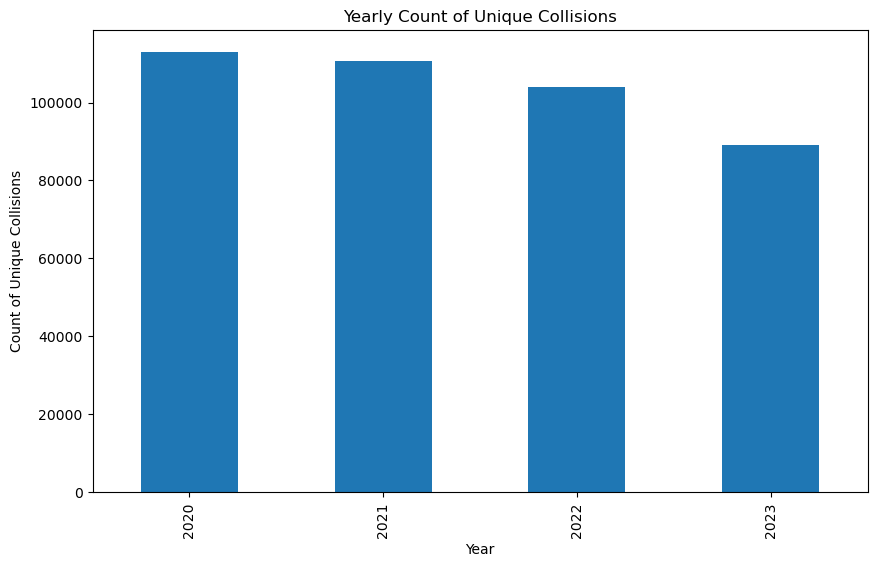

In [32]:
# Now we group by 'Year' and count the unique collisions
unique_collisions_per_year = Crash_df.groupby('CrashYear')['CollisionId'].nunique()

# Plotting the bar chart
unique_collisions_per_year.plot(kind='bar', figsize=(10,6))

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count of Unique Collisions')
plt.title('Yearly Count of Unique Collisions')

# Display the plot

plt.show()

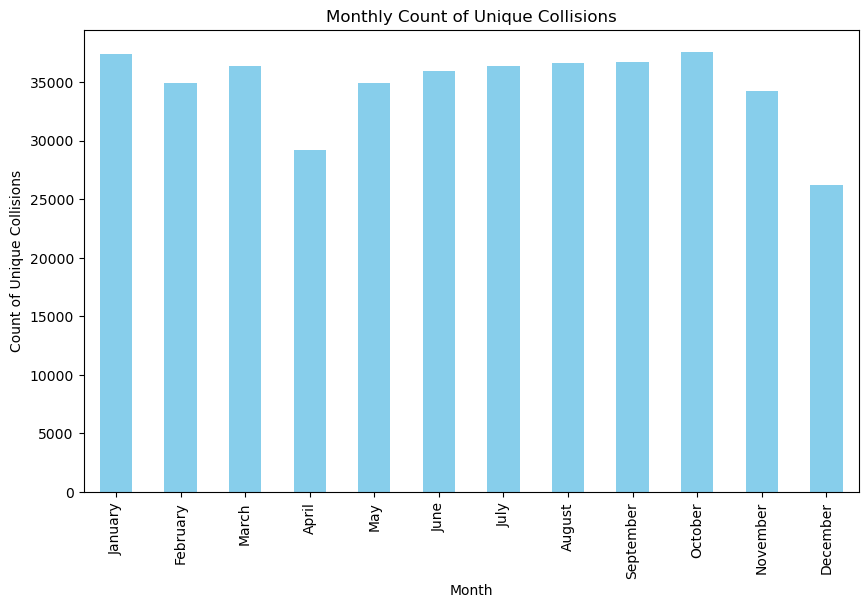

In [33]:
# Group by 'CrashMonth' and count unique 'CollisionID'
monthly_collisions = Crash_df.groupby('CrashMonth')['CollisionId'].nunique()


# Sort the index according to calendar months
monthly_collisions = monthly_collisions.reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    fill_value=0
)

# Plotting the bar chart
monthly_collisions.plot(kind='bar', figsize=(10,6), color='skyblue')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Count of Unique Collisions')
plt.title('Monthly Count of Unique Collisions')

# Display the plot
plt.show()

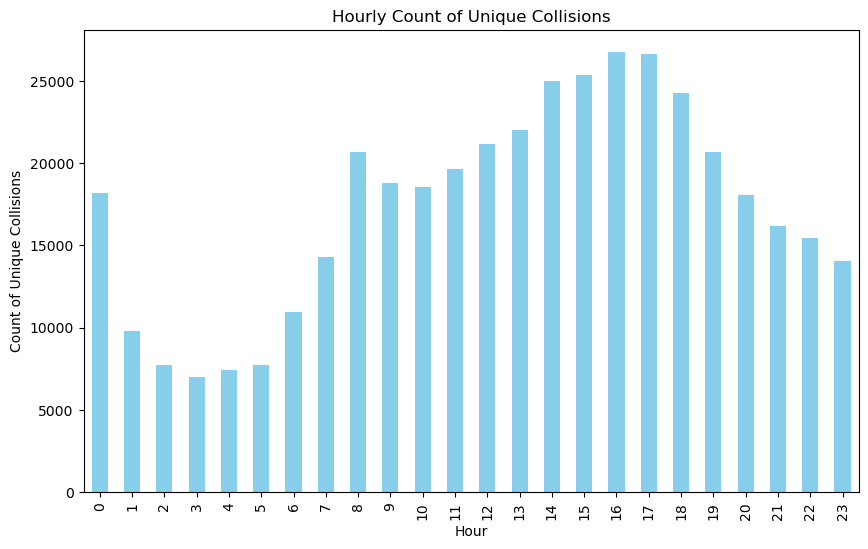

In [34]:
# Group by 'CrashMonth' and count unique 'CollisionID'
Hourly_collisions = Crash_df.groupby('CrashHour')['CollisionId'].nunique()


# Plotting the bar chart
Hourly_collisions.plot(kind='bar', figsize=(10,6), color='skyblue')

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Count of Unique Collisions')
plt.title('Hourly Count of Unique Collisions')

# Display the plot
plt.show()

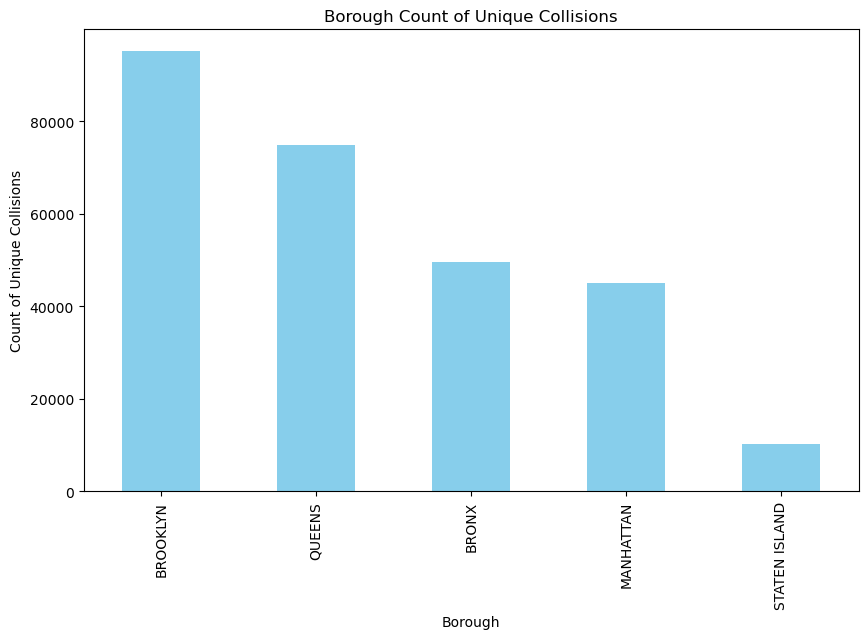

In [35]:
# Group by 'CrashMonth' and count unique 'CollisionID'
Borough_collisions = Crash_df.groupby('Borough')['CollisionId'].nunique()

# Sort the values in descending order
Borough_collisions = Borough_collisions.sort_values(ascending=False)

# Plotting the bar chart
Borough_collisions.plot(kind='bar', figsize=(10,6), color='skyblue')




# Adding labels and title
plt.xlabel('Borough')
plt.ylabel('Count of Unique Collisions')
plt.title('Borough Count of Unique Collisions')

# Display the plot
plt.show()

In [36]:

# def Barchart_Injured(CategoryColumn, NumericColumn, xlabel, ylabel, title):

#     # Now we group by 'Year' and count the unique collisions
#     NumberOfPersonsInjured_per_year = Crash_df.groupby('CrashYear')['NumberOfPersonsInjured'].sum()

#     ##### Sorting values
#     NumberOfPersonsInjured_per_year = NumberOfPersonsInjured_per_year.sort_values(ascending=False)


#     # Plotting the bar chart
#     NumberOfPersonsInjured_per_year.plot(kind='bar', figsize=(10,6))

#     # Adding labels and title
#     plt.xlabel('Year')
#     plt.ylabel('No of Persons Injured')
#     plt.title('Yearly NumberOfPersonsInjured')

#     # Display the plot

#     plt.show()

In [37]:
def Barchart_Injured(x_column, y_column, xlabel, ylabel, title):

    # Now we group by 'Year' and count the unique collisions
    NumberOfPersonsInjured_per_year = Crash_df.groupby(x_column)[y_column].sum()

    ##### Sorting values
    NumberOfPersonsInjured_per_year = NumberOfPersonsInjured_per_year.sort_values(ascending=False)


    # Plotting the bar chart
    NumberOfPersonsInjured_per_year.plot(kind='bar', figsize=(10,6))

    # Adding labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Display the plot

    return plt.show()

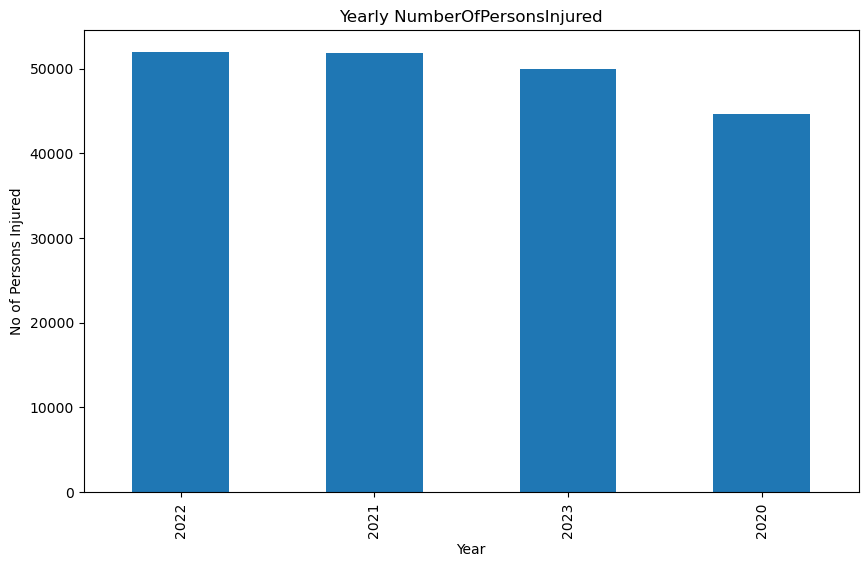

In [38]:
Barchart_Injured('CrashYear', 'NumberOfPersonsInjured', 'Year', 'No of Persons Injured', 'Yearly NumberOfPersonsInjured')

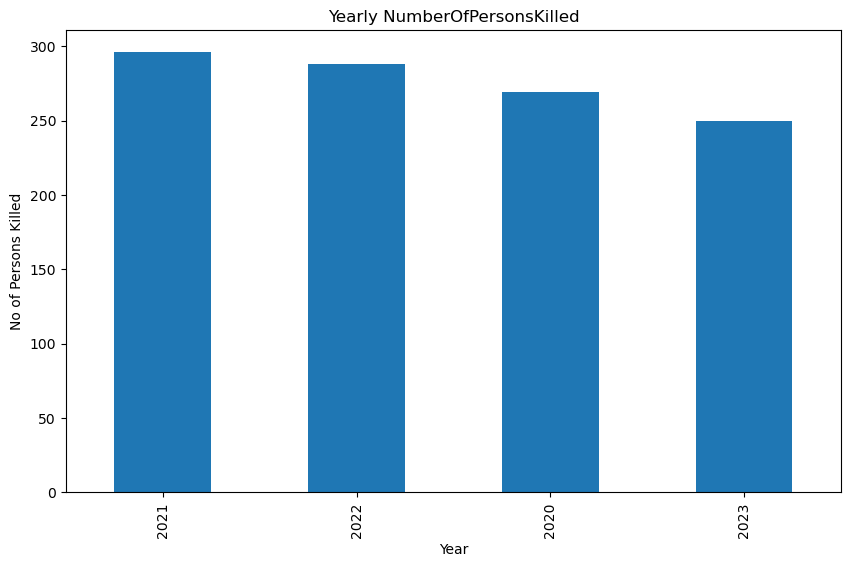

In [39]:
Barchart_Injured('CrashYear', 'NumberOfPersonsKilled', 'Year', 'No of Persons Killed', 'Yearly NumberOfPersonsKilled')

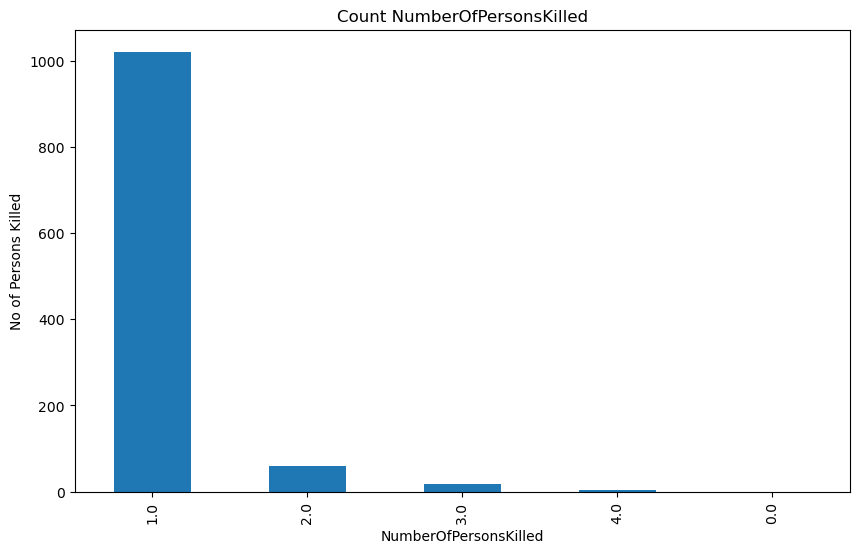

In [40]:
Barchart_Injured('NumberOfPersonsKilled', 'NumberOfPersonsKilled', 'NumberOfPersonsKilled', 'No of Persons Killed', 'Count NumberOfPersonsKilled')

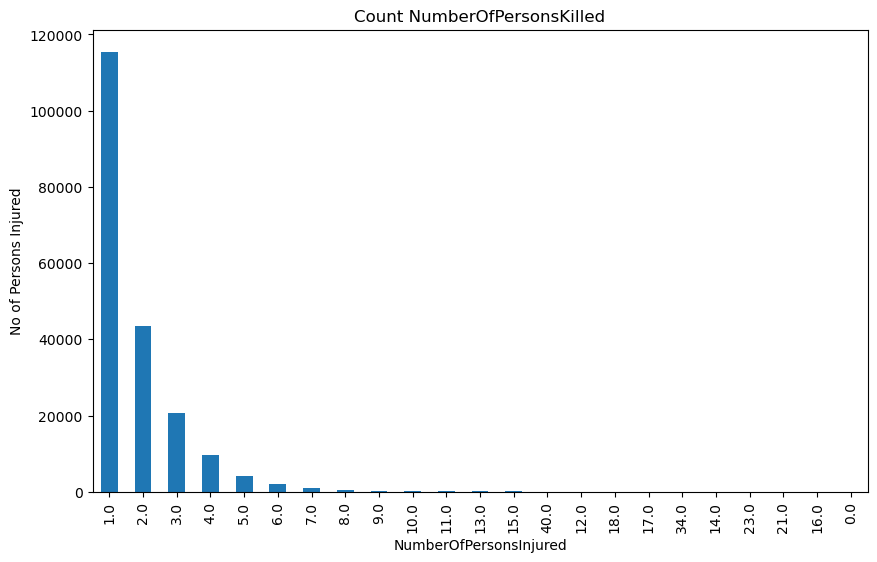

In [41]:
Barchart_Injured('NumberOfPersonsInjured', 'NumberOfPersonsInjured', 'NumberOfPersonsInjured', 'No of Persons Injured', 'Count NumberOfPersonsKilled')

Injured people count is very high compared to killed people in accidents

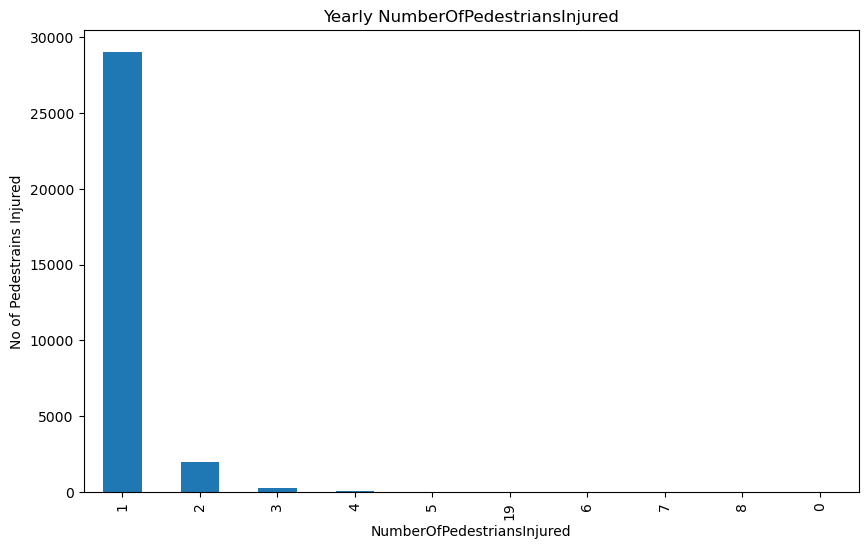

In [42]:
Barchart_Injured('NumberOfPedestriansInjured', 'NumberOfPedestriansInjured', 'NumberOfPedestriansInjured', 'No of Pedestrains Injured', 'Yearly NumberOfPedestriansInjured')

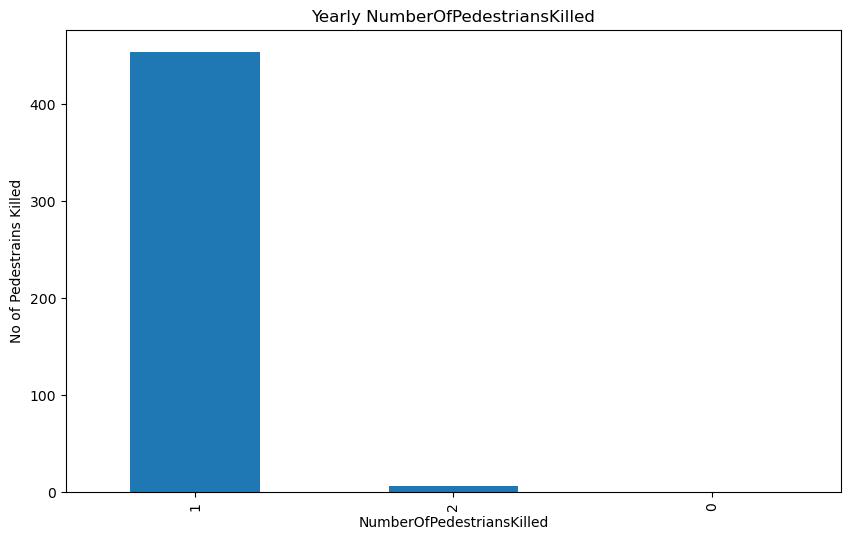

In [43]:
Barchart_Injured('NumberOfPedestriansKilled', 'NumberOfPedestriansKilled', 'NumberOfPedestriansKilled', 'No of Pedestrains Killed', 'Yearly NumberOfPedestriansKilled')

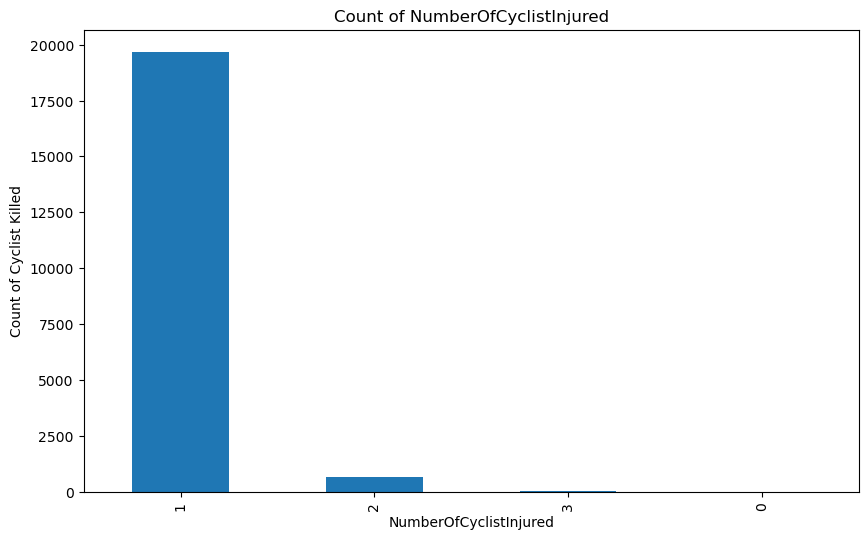

In [44]:
Barchart_Injured('NumberOfCyclistInjured', 'NumberOfCyclistInjured', 'NumberOfCyclistInjured', 'Count of Cyclist Killed', 'Count of NumberOfCyclistInjured')

As analyzing the patterns in most of the accidents, most people killed / injured are counted as 1, that can be understood as no of people in the vehicle are 1 at the movement

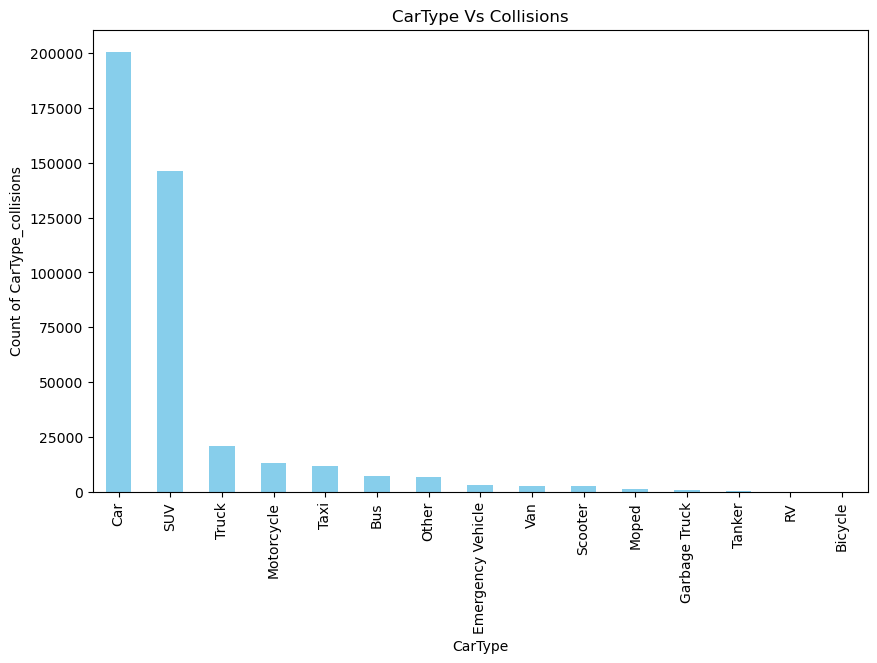

In [45]:
# Group by 'CrashMonth' and count unique 'CollisionID'
CarType_collisions = Crash_df.groupby('Categorized_VehicleType')['Categorized_VehicleType'].count()

# Sort the values in descending order
CarType_collisions = CarType_collisions.sort_values(ascending=False)

# Plotting the bar chart
CarType_collisions.plot(kind='bar', figsize=(10,6), color='skyblue')




# Adding labels and title
plt.xlabel('CarType')
plt.ylabel('Count of CarType_collisions')
plt.title('CarType Vs Collisions')

# Display the plot
plt.show()

In [46]:
Crash_df['ContributingFactorVehicle1'].value_counts()##.to_clipboard()

Driver Inattention/Distraction                           105478
Unspecified                                              103383
Failure to Yield Right-of-Way                             28093
Following Too Closely                                     27259
Passing or Lane Usage Improper                            17858
Passing Too Closely                                       15292
Unsafe Speed                                              14244
Backing Unsafely                                          13420
Other Vehicular                                           11814
Traffic Control Disregarded                               11250
Turning Improperly                                         9001
Unsafe Lane Changing                                       8854
Driver Inexperience                                        8006
Alcohol Involvement                                        6680
Reaction to Uninvolved Vehicle                             5744
Pedestrian/Bicyclist/Other Pedestrian Er

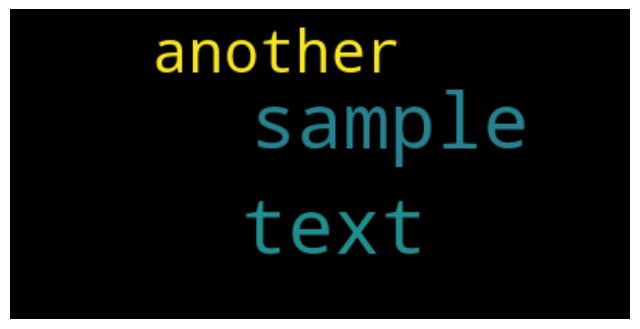

In [47]:

# Create a dataframe
df = pd.DataFrame({'text': ['This is a sample text', 'This is another sample text']})

# Create a word cloud object
wordcloud = WordCloud(max_font_size=50, max_words=100)

# Generate a word cloud
wordcloud.generate(df['text'].to_string())

# Display the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

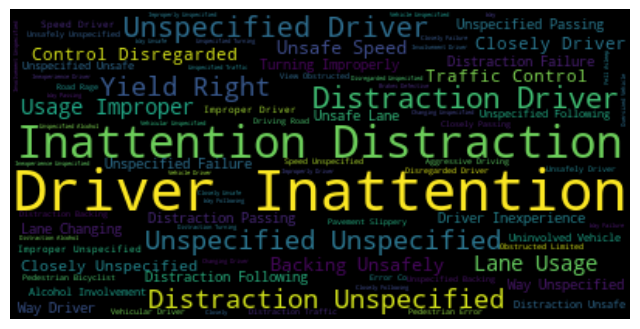

In [48]:


# Create a word cloud object
wordcloud = WordCloud(max_font_size=50, max_words=100)

# Generate a word cloud
wordcloud.generate(Crash_df['ContributingFactorVehicle1'].to_string())

# Display the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

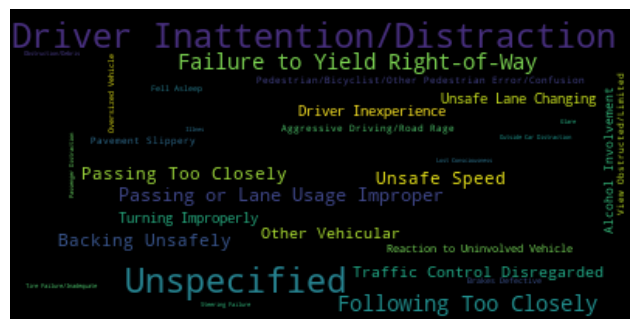

In [49]:

# Assuming 'Crash_df' is your DataFrame and 'ContributingFactorVehicle1' contains the contributing factors

# Count the occurrences of each contributing factor
frequencies = Crash_df['ContributingFactorVehicle1'].value_counts().to_dict()

# Create a word cloud object
wordcloud = WordCloud(max_font_size=50, max_words=100)

# Generate a word cloud based on frequencies
wordcloud.generate_from_frequencies(frequencies)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


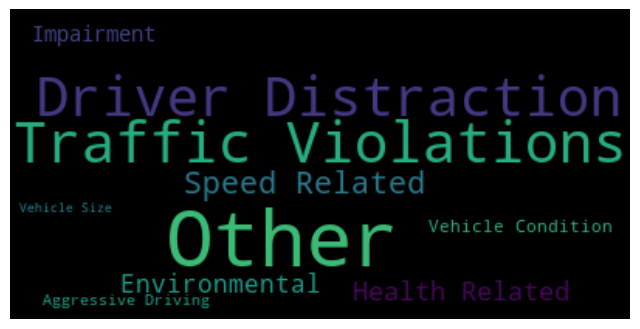

In [50]:


# Assuming 'Crash_df' is your DataFrame and 'ContributingFactorVehicle1' contains the contributing factors

# Count the occurrences of each contributing factor
frequencies = Crash_df['Categorized_ContributingFactor'].value_counts().to_dict()

# Create a word cloud object
wordcloud = WordCloud(max_font_size=50, max_words=100)

# Generate a word cloud based on frequencies
wordcloud.generate_from_frequencies(frequencies)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [52]:
########## Saving Data

print("Length: ", len(Crash_df))
Crash_df['Borough'] = Crash_df['Borough'].fillna('Null')
Crash_df['Latitude'] = Crash_df['Latitude'].fillna(0)
Crash_df['Longitude'] = Crash_df['Longitude'].fillna(0)
Crash_df['Location'] = Crash_df['Location'].fillna(0)

Crash_df.head()

Length:  416468


,CollisionId,CrashDate,CrashTime,Borough,ZipCode,Latitude,Longitude,Location,OnStreetName,CrossStreetName,OffStreetName,NumberOfPersonsInjured,NumberOfPersonsKilled,NumberOfPedestriansInjured,NumberOfPedestriansKilled,NumberOfCyclistInjured,NumberOfCyclistKilled,NumberOfMotoristInjured,NumberOfMotoristKilled,ContributingFactorVehicle1,ContributingFactorVehicle2,ContributingFactorVehicle3,ContributingFactorVehicle4,ContributingFactorVehicle5,VehicleTypeCode1,VehicleTypeCode2,VehicleTypeCode3,VehicleTypeCode4,VehicleTypeCode5,CrashHour,CrashYear,CrashMonth,Categorized_VehicleType,Categorized_ContributingFactor
0,4455765,2021-09-11,02:39:00,Null,NaN,0.000000,0.000000,0,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN,2,2021,September,Car,Aggressive Driving
1,4513547,2022-03-26,11:45:00,Null,NaN,0.000000,0.000000,0,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN,11,2022,March,Car,Environmental
2,4541903,2022-06-29,06:55:00,Null,NaN,0.000000,0.000000,0,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,Sedan,Pick-up Truck,NaN,NaN,NaN,6,2022,June,Car,Traffic Violations
3,4456314,2021-09-11,09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN,9,2021,September,Car,Other
4,4486609,2021-12-14,08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN,8,2021,December,Car,Driver Distraction


In [53]:
# Crash_df.to_csv('Semi_Cleaned_CrashesData.csv', index=False)

# Creating Base tables

# Dimensional Modelling

# Inserting into dimensional model tables from base tables

In [ ]:
-- Insert data into Date Dimension Table
INSERT INTO nyc_crashes.date_table (date_id, crash_date, crash_hour, crash_year, crash_month)
SELECT DISTINCT
    ROW_NUMBER() OVER (ORDER BY CrashDate) AS location_id,
    CrashDate,
    EXTRACT(HOUR FROM CrashTime) AS crash_hour,
    EXTRACT(YEAR FROM CrashDate) AS crash_year,
    EXTRACT(MONTH FROM CrashDate) AS crash_month
FROM Crashes;

-- Insert data into Location Dimension Table
INSERT INTO nyc_crashes.location_table (location_id, borough, zipcode, latitude, longitude)
SELECT DISTINCT
    ROW_NUMBER() OVER (ORDER BY ZipCode) AS location_id, -- Assuming a unique ID is generated since not provided
    Borough,
    CAST(ZipCode AS UNSIGNED),
    Latitude,
    Longitude
FROM Crashes;

-- Insert data into Contributing Factor Dimension Table
INSERT INTO nyc_crashes.contribution_factor (contribution_id, contribution_factor1, categorized_contributingfactor)
SELECT DISTINCT
    ROW_NUMBER() OVER (ORDER BY ContributingFactorVehicle1) AS contribution_id, -- Generating a unique ID
    ContributingFactorVehicle1,
    Categorized_ContributingFactor
FROM Crashes;

-- Insert data into Vehicle Dimension Table
INSERT INTO nyc_crashes.vehicle (vehicle_id, vehicle_type_code1, categorized_vehicletype)
SELECT DISTINCT
    VehicleId AS vehicle_id,
    VehicleTypeCode1,
    Categorized_VehicleType
FROM Crashes;

-- Insert data into Persons Dimension Table
INSERT INTO nyc_crashes.persons (person_id, person_type, person_injury, person_age, ped_role, person_sex)
SELECT DISTINCT
    PersonId AS person_id,
    PersonType,
    PersonInjury,
    CAST(PersonAge AS INT), -- Assuming you convert the float to an int
    PedRole,
    PersonSex
FROM People;


-- Insert data into the Crashes Fact Table
INSERT INTO nyc_crashes.crashes_f (collision_id, date_id, location_id, person_id, contribution_id, vehicle_id, ...)
SELECT 
    c.CollisionId,
    d.date_id,
    l.location_id,
    p.person_id,
    cf.contribution_id,
    v.vehicle_id,
    c.number_of_persons_injured,
    c.number_of_persons_killed,
    c.number_of_pedestrians_injured,
    c.number_of_pedestrians_killed,
    c.number_of_cyclist_injured,
    c.number_of_cyclist_killed,
    c.number_of_motorist_injured,
    c.number_of_motorist_killed
    
FROM 
    Crashes c
INNER JOIN 
    nyc_crashes.date_table d ON c.CrashDate = d.crash_date
INNER JOIN 
    nyc_crashes.location_table l ON c.ZipCode = l.zipcode AND c.Borough = l.borough
INNER JOIN 
    nyc_crashes.persons p ON c.CollisionId = p.person_id
INNER JOIN 
    nyc_crashes.contribution_factor cf ON c.ContributingFactorVehicle1 = cf.contribution_factor1
INNER JOIN 
    nyc_crashes.vehicle v ON c.VehicleTypeCode1 = v.vehicle_type_code1;
